In [40]:
from fbprophet import Prophet
from prophet.diagnostics import cross_validation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_pickle('../Data/ELC_12-14_15min_dropped.pkl')
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01 00:15:00,3.807107,22.759602,77.324066,136.178862,70.731707,351.190476,9.609949,279.461279,75.174825,87.096774,...,223.684211,128.479657,28500.0,1729.957806,1704.545455,15.645372,12.873025,504.828797,63.439065,761.730205
2012-01-01 00:30:00,5.076142,22.759602,77.324066,136.178862,73.170732,354.166667,9.044658,279.461279,73.426573,84.946237,...,236.842105,127.765882,26400.0,1654.008439,1659.090909,15.645372,13.458163,525.021949,60.100167,702.346041
2012-01-01 00:45:00,3.807107,22.759602,77.324066,140.243902,69.512195,348.214286,8.479367,279.461279,75.174825,91.397849,...,214.912281,114.204140,25200.0,1333.333333,1636.363636,15.645372,10.532475,526.777875,56.761269,696.480938
2012-01-01 01:00:00,3.807107,22.759602,77.324066,140.243902,75.609756,339.285714,7.348785,279.461279,68.181818,88.172043,...,200.657895,112.062812,23800.0,1324.894515,1636.363636,15.645372,14.628438,539.947322,63.439065,693.548387
2012-01-01 01:15:00,5.076142,22.048364,77.324066,146.341463,73.170732,342.261905,6.783493,265.993266,69.930070,86.021505,...,199.561404,112.776588,23700.0,1118.143460,1659.090909,15.645372,9.947338,556.628622,68.447412,723.607038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,72.043011,...,206.140351,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393
2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,72.043011,...,192.982456,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839
2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,74.193548,...,191.885965,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,72.043011,...,190.789474,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566


In [42]:
df = df.resample('1D').mean()
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01,7.493989,26.293329,21.043486,119.833119,57.779204,259.805764,5.682663,232.996633,60.581524,66.281834,...,390.927978,271.129644,29533.684211,2097.357317,2127.272727,18.060797,10.409288,433.325632,51.647483,695.539435
2012-01-02,10.681049,26.834400,4.986606,128.006436,64.723069,243.582589,4.127803,293.806117,87.357955,57.885305,...,543.973867,320.187961,36400.000000,2514.196554,2549.715909,77.995980,23.472547,568.252488,147.450612,805.252627
2012-01-03,10.839679,29.960882,8.072690,122.967480,67.251016,233.413938,3.798050,292.262907,81.220862,85.091846,...,579.507036,250.111527,35885.416667,2401.503165,2861.742424,81.567797,27.489272,578.486245,162.632165,836.792827
2012-01-04,11.394882,26.145389,14.262960,121.845359,69.296240,237.444196,3.874600,284.652076,81.038753,73.756720,...,530.895925,299.443850,35635.416667,2569.356540,2851.325758,78.213277,22.771601,554.479441,149.554814,798.234360
2012-01-05,14.078363,27.508594,41.304663,121.803015,66.501524,220.920139,3.450631,274.901796,81.931090,80.421147,...,533.888432,274.907804,36235.416667,2436.225387,2712.357955,76.583551,25.611956,588.024949,195.673344,831.699047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-28,2.366223,22.203947,1.574718,149.242039,70.591972,209.604415,4.475221,263.082211,53.321678,49.943996,...,421.086897,300.157626,34084.375000,2299.182489,2682.054924,85.098870,5.753852,478.279558,45.892460,688.912818
2014-12-29,2.590948,23.048542,1.674269,146.532012,74.987297,237.754216,5.735350,315.481201,69.766171,66.017025,...,431.549251,300.261718,32386.458333,2154.711674,2803.030303,87.896567,12.019700,561.759219,134.529772,769.611437
2014-12-30,2.419099,22.974455,1.719519,148.860942,74.885671,248.759921,6.112210,321.969697,67.580857,67.596326,...,370.031524,296.752320,30253.125000,2126.318565,2745.975379,110.576923,9.295153,586.817749,166.631886,770.314027
2014-12-31,2.392661,23.678284,1.737619,145.896850,73.158028,244.915675,7.195685,298.961841,64.703526,52.441756,...,302.780062,280.945158,28633.333333,1693.301688,2248.816288,77.249022,5.522235,523.540386,137.973011,733.504399


In [43]:
df = df.loc['2012-01-01':'2014-12-31']
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01,7.493989,26.293329,21.043486,119.833119,57.779204,259.805764,5.682663,232.996633,60.581524,66.281834,...,390.927978,271.129644,29533.684211,2097.357317,2127.272727,18.060797,10.409288,433.325632,51.647483,695.539435
2012-01-02,10.681049,26.834400,4.986606,128.006436,64.723069,243.582589,4.127803,293.806117,87.357955,57.885305,...,543.973867,320.187961,36400.000000,2514.196554,2549.715909,77.995980,23.472547,568.252488,147.450612,805.252627
2012-01-03,10.839679,29.960882,8.072690,122.967480,67.251016,233.413938,3.798050,292.262907,81.220862,85.091846,...,579.507036,250.111527,35885.416667,2401.503165,2861.742424,81.567797,27.489272,578.486245,162.632165,836.792827
2012-01-04,11.394882,26.145389,14.262960,121.845359,69.296240,237.444196,3.874600,284.652076,81.038753,73.756720,...,530.895925,299.443850,35635.416667,2569.356540,2851.325758,78.213277,22.771601,554.479441,149.554814,798.234360
2012-01-05,14.078363,27.508594,41.304663,121.803015,66.501524,220.920139,3.450631,274.901796,81.931090,80.421147,...,533.888432,274.907804,36235.416667,2436.225387,2712.357955,76.583551,25.611956,588.024949,195.673344,831.699047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,2.207593,22.352122,1.846221,155.678354,76.753049,230.499752,5.252497,299.487935,62.153992,58.523746,...,360.517178,294.343326,32872.916667,2285.249648,2717.803030,87.910148,7.271553,557.095040,81.489983,739.254949
2014-12-28,2.366223,22.203947,1.574718,149.242039,70.591972,209.604415,4.475221,263.082211,53.321678,49.943996,...,421.086897,300.157626,34084.375000,2299.182489,2682.054924,85.098870,5.753852,478.279558,45.892460,688.912818
2014-12-29,2.590948,23.048542,1.674269,146.532012,74.987297,237.754216,5.735350,315.481201,69.766171,66.017025,...,431.549251,300.261718,32386.458333,2154.711674,2803.030303,87.896567,12.019700,561.759219,134.529772,769.611437
2014-12-30,2.419099,22.974455,1.719519,148.860942,74.885671,248.759921,6.112210,321.969697,67.580857,67.596326,...,370.031524,296.752320,30253.125000,2126.318565,2745.975379,110.576923,9.295153,586.817749,166.631886,770.314027


In [44]:
df_marked = df.copy()

In [5]:
starting = []
for column in tqdm(range(len(df.columns))):
    for i in range(len(df_marked)-1):
        if df.iloc[i,column] == 0 and df.iloc[i+1,column] == 0:
            df_marked.iloc[i,column] = np.nan
        elif df.iloc[i,column] == 0 and df.iloc[i+1,column] > 0:
            df_marked.iloc[i,column] = np.nan
            starting.append(i)
            break
        
df_marked
        

 14%|█▍        | 52/370 [00:17<01:49,  2.91it/s]


KeyboardInterrupt: 

In [45]:
df_avg_1h = []
for i in tqdm(range(df_marked.shape[0])):
    df_avg_1h.append(df_marked.iloc[i,:].sum()/len(df_marked.iloc[i,:].dropna()))
df_avg_1h = pd.DataFrame(df_avg_1h,index=df_marked.index,columns=['avg_1h'])
df_avg_1h

100%|██████████| 1096/1096 [00:00<00:00, 10145.52it/s]


,avg_1h
2012-01-01,399.521686
2012-01-02,590.506390
2012-01-03,591.221033
2012-01-04,593.381152
2012-01-05,595.020094
...,...
2014-12-27,546.376092
2014-12-28,540.622141
2014-12-29,542.862690
2014-12-30,541.107932


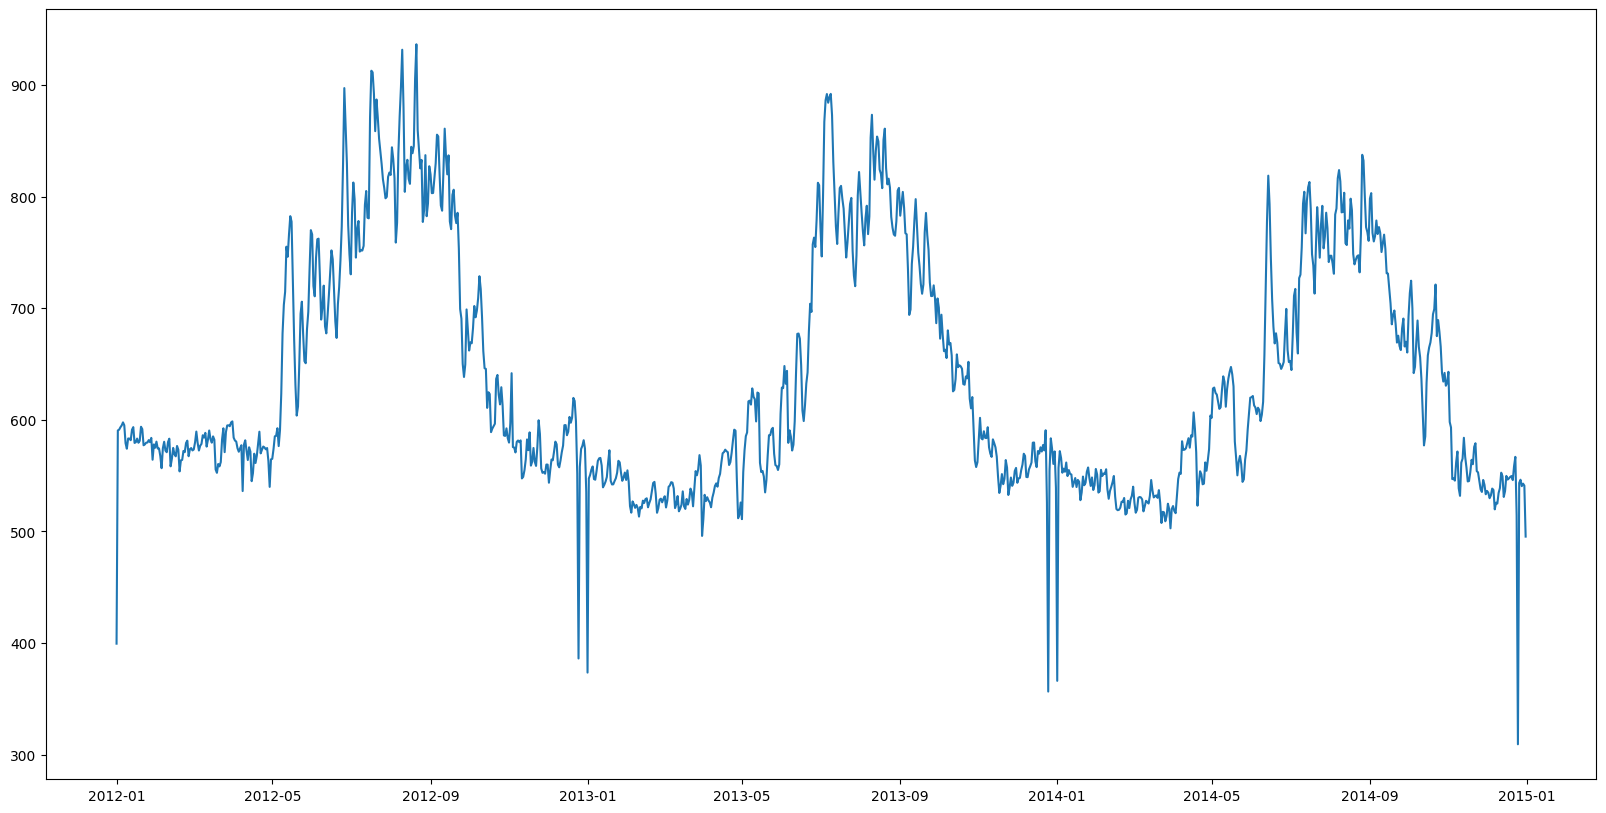

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df_avg_1h)

In [47]:
#df_avg_1h.to_pickle('../Data/df_avg_1h.pkl')

In [48]:
df_avg_1h['ds'] = df_avg_1h.index
df_avg_1h['y'] = df_avg_1h['avg_1h']
df_avg_1h = df_avg_1h.drop('avg_1h',axis=1)

In [49]:
df_avg_1h

,ds,y
2012-01-01,2012-01-01,399.521686
2012-01-02,2012-01-02,590.506390
2012-01-03,2012-01-03,591.221033
2012-01-04,2012-01-04,593.381152
2012-01-05,2012-01-05,595.020094
...,...,...
2014-12-27,2014-12-27,546.376092
2014-12-28,2014-12-28,540.622141
2014-12-29,2014-12-29,542.862690
2014-12-30,2014-12-30,541.107932


In [50]:
training_x = df_avg_1h.iloc[:int(len(df_avg_1h)*0.8)]
val_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.8):int(len(df_avg_1h)*0.9)]
testing_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.9):]

In [51]:
print(training_x.shape)
print(val_x.shape)
print(testing_x.shape)


(876, 2)
(110, 2)
(110, 2)


In [52]:
m = Prophet(growth='linear',yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True,seasonality_mode='multiplicative')
m.add_country_holidays(country_name='PT')
m.fit(training_x)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2565.42    0.00176172       292.694           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2568.41   0.000250377       74.7948           1           1      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2569.36   0.000135042       75.2714      0.1424      0.1424      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335        2569.5   5.75668e-05       135.523   4.714e-07       0.001      473  LS failed, Hessian reset 
     399       2569.56   3.40121e-05       83.0918           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2569.71   6.73728e-05       76.4606           1           1      6

In [53]:
future = val_x[['ds']]
future.tail()

,ds
2014-09-08,2014-09-08
2014-09-09,2014-09-09
2014-09-10,2014-09-10
2014-09-11,2014-09-11
2014-09-12,2014-09-12


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
105,2014-09-08,767.735940,728.426202,808.158110
106,2014-09-09,773.997551,734.666425,815.490185
107,2014-09-10,770.270964,730.214433,810.991992
108,2014-09-11,768.412824,729.485230,810.028320
109,2014-09-12,769.283578,728.439035,804.837140


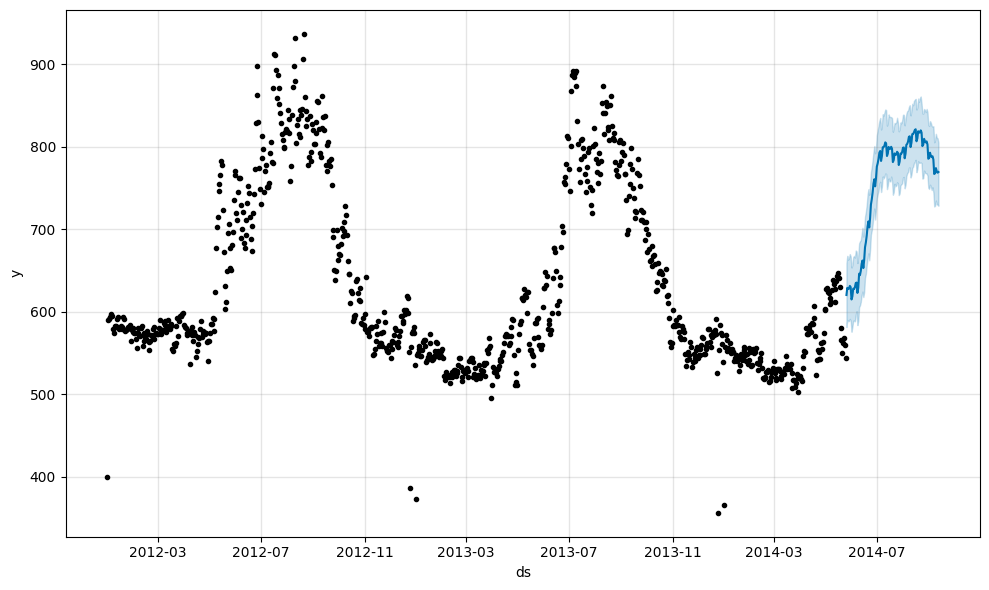

In [55]:
fig1 = m.plot(forecast)

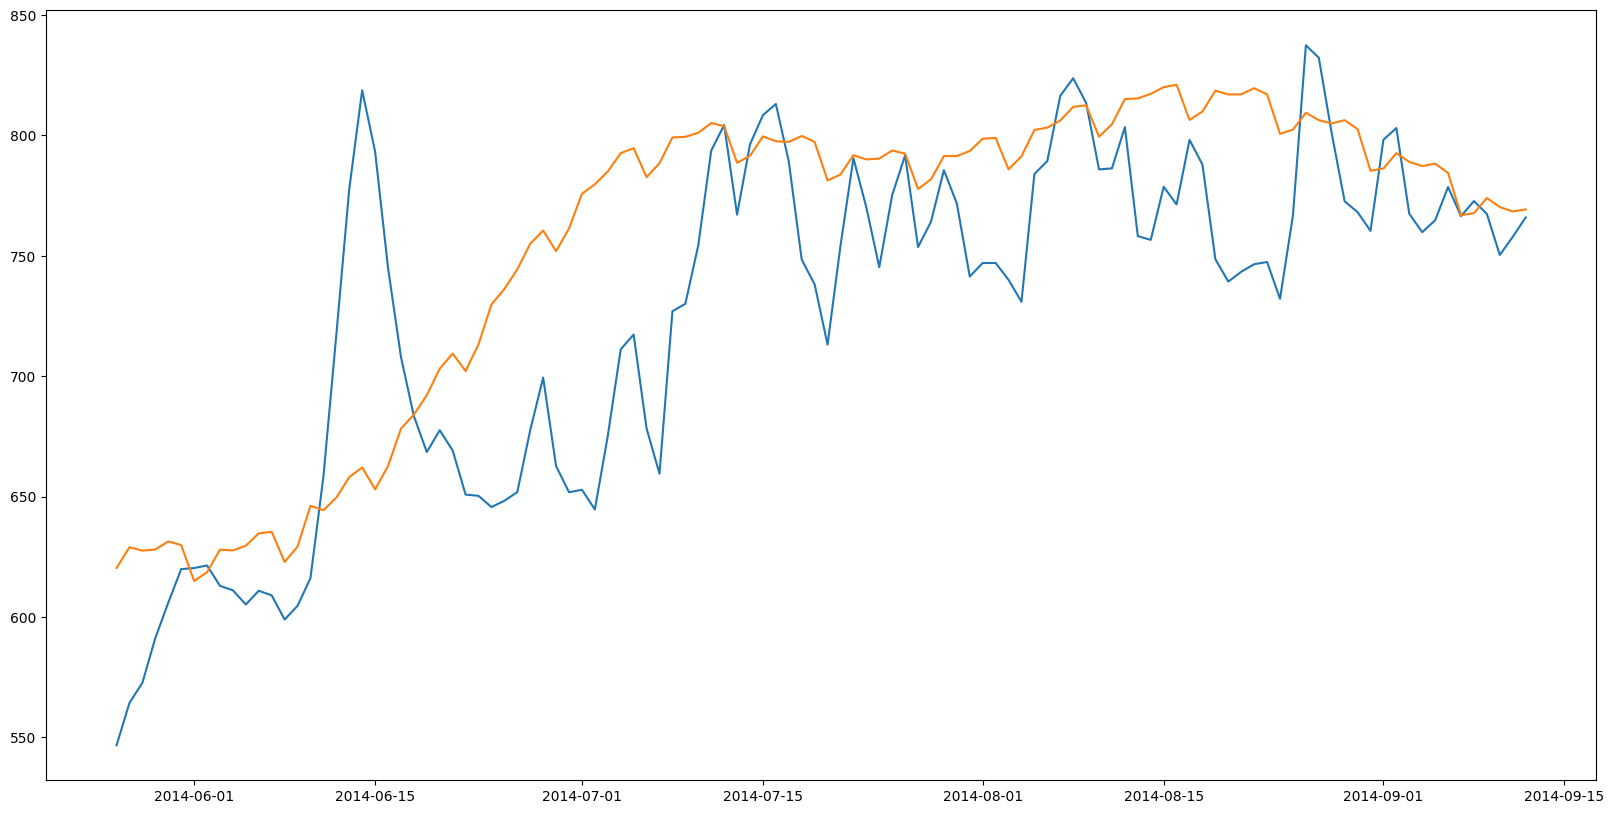

In [56]:
plt.figure(figsize=(20,10))
plt.plot(val_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [57]:
print(mean_absolute_percentage_error(val_x['y'],forecast['yhat']))

0.05961551736317611


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


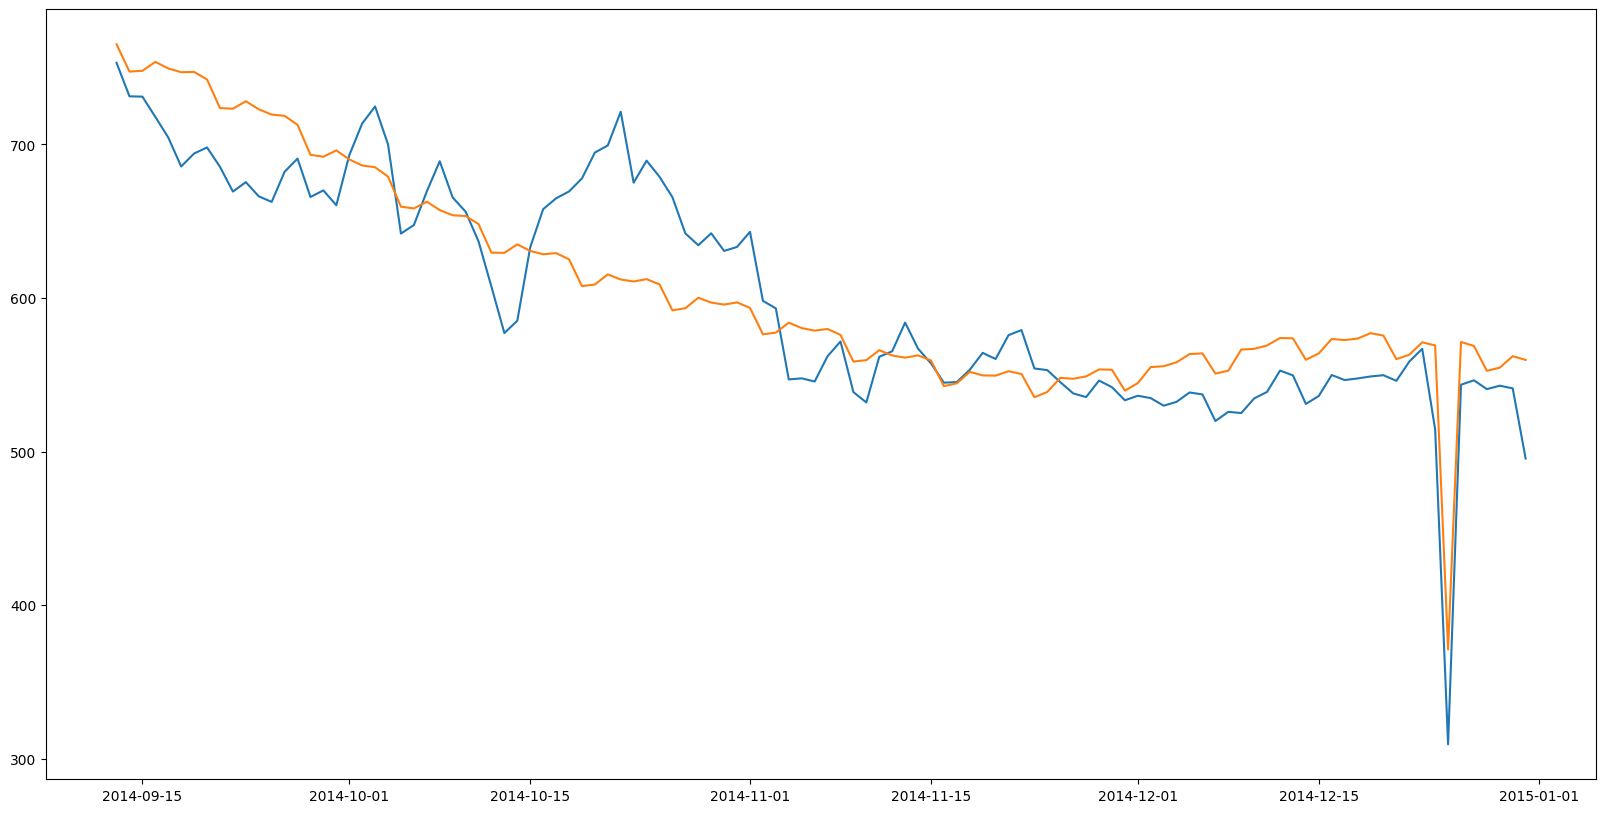

In [58]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [59]:
print(mean_absolute_percentage_error(testing_x['y'],forecast['yhat']))

0.04839327262085314


/opt/homebrew/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabe

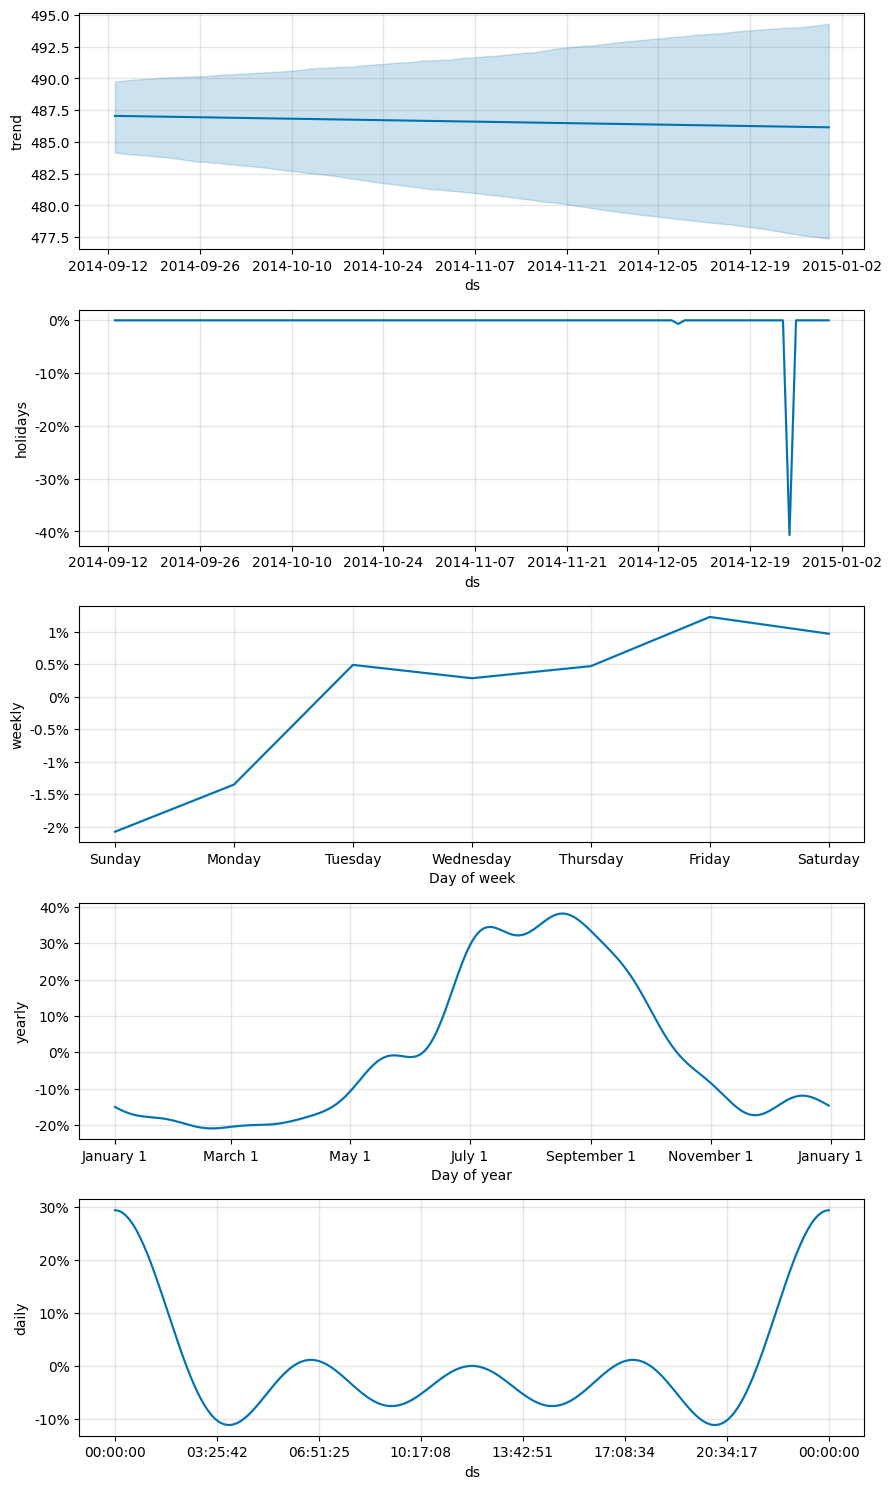

In [60]:
fig = m.plot_components(forecast)

# Hyperparameter tuning with Bayes Optimization

In [61]:
from bayes_opt import BayesianOptimization

In [62]:
def prophet_objective(changepoint_prior_scale, seasonality_prior_scale, holiday_prior_scale, interval_width, changepoint_range):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale= holiday_prior_scale,
        interval_width= interval_width,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode='multiplicative',
        changepoint_range=changepoint_range
    )
    model.add_country_holidays(country_name='PT')
    model.fit(training_x)

    forecast = model.predict(val_x[['ds']])
    mape = mean_absolute_percentage_error(val_x['y'], forecast['yhat'])
    return -mape

# Set bounds for the hyperparameters
bounds = {
    'changepoint_prior_scale': (0.001, 0.5),
    'seasonality_prior_scale': (0.01, 10),
    'holiday_prior_scale': (0.01, 10),
    'interval_width': (0.01,0.95),
    'changepoint_range': (0.8,0.95)
}

# Initialize the Bayesian optimization
optimizer = BayesianOptimization(
    f=prophet_objective,
    pbounds=bounds,
    random_state=42,
)

# Perform the optimization
optimizer.maximize(init_points=10, n_iter=20)

|   iter    |  target   | change... | change... | holida... | interv... | season... |
-------------------------------------------------------------------------------------


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2572.53    0.00163669       87.9322           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       2575.14   0.000366414       143.172   7.782e-06       0.001      242  LS failed, Hessian reset 
     199        2576.3    0.00161822       223.877           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2577.79    0.00261473       91.5082      0.2165           1      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2580.08    0.00119917       256.676      0.6075     0.06075      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2585.23    0.00107123    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 1         | -0.1639   | 0.1879    | 0.9426    | 7.323     | 0.5727    | 1.569     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2568.06    0.00131381       165.451           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2571.29    0.00214219        83.958      0.5042      0.5042      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2572.51   8.47587e-05       79.3511           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       2572.61   0.000486234       118.119   7.563e-06       0.001      397  LS failed, Hessian reset 
     399       2572.93   0.000522118       48.3027           1           1      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     447       2573.52   0.000180525    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 2         | -0.1897   | 0.07884   | 0.8087    | 8.663     | 0.575     | 7.084     |
Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2552.61    0.00282796       869.926           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       2557.55   0.000277526       442.399   6.851e-07       0.001      206  LS failed, Hessian reset 
     180       2557.65   4.78524e-08       356.085      0.9207      0.9207      267   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 3         | -0.06423  | 0.01127   | 0.9455    | 8.326     | 0.2096    | 1.826     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2570.02   0.000305615       45.9088           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2573.39    0.00709466       163.489           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2575.09   0.000386803       89.3043      0.6781      0.6781      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2576.12    0.00365185       145.269           1           1      497   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2578.33    0.00292406        188.72           1           1      611   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 4         | -0.4326   | 0.09252   | 0.8456    | 5.252     | 0.416     | 2.919     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.39    0.00255047       143.546      0.6548      0.6548      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2576.97    0.00267934       116.059           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2587.12     0.0168653       812.967      0.4349           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2599.13     0.0130799       518.799           1           1      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2613.13     0.0354975        1248.6           1           1      612   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 5         | -0.4711   | 0.3063    | 0.8209    | 2.929     | 0.3544    | 4.566     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.36    0.00273746       81.3315           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2581.11    0.00335598       129.694           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2588.03    0.00178005       506.842      0.4766      0.4766      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2600.21    0.00127479       338.822           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2625.79    0.00886278       773.367           1           1      594   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 6         | -0.3255   | 0.3928    | 0.83      | 5.147     | 0.5669    | 0.474     |
Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.39    0.00255475       193.543           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2578.52    0.00900064         233.3           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2592.16    0.00677442       273.837           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2601.11    0.00505432       1203.35      0.2247           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2621.41      0.018387       1192.97           1   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 7         | -0.3508   | 0.3042    | 0.8256    | 0.6599    | 0.902     | 9.657     |
Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.73   0.000870553       110.032           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2582.76    0.00205409       121.071           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2599.82   0.000699226       497.535      0.2154      0.2154      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2605.81    0.00142211       137.979           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2610.67    0.00306345       173.793           1   

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 8         | -0.6625   | 0.4044    | 0.8457    | 0.9857    | 0.6532    | 4.407     |
Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2566.32   0.000239442       52.6751           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2568.53    0.00529233       103.633      0.2637           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2569.13   1.24699e-05       46.0957           1           1      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       2569.16   5.24065e-05       74.5179   1.031e-06       0.001      456  LS failed, Hessian reset 
     399       2569.17   0.000186393       61.1923           1           1      563   
    Iter      log prob        ||dx||      ||gr

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 9         | -0.06176  | 0.0619    | 0.8743    | 0.3535    | 0.8648    | 2.595     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.39     0.0069473        263.92           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2581.73    0.00144596       132.342           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2598.38   0.000366477        132.39           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2607.89    0.00472209       1149.78      0.4943           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2619.52    0.00389146       318.416           1           1      578   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 10        | -0.6138   | 0.3316    | 0.8468    | 5.205     | 0.5239    | 1.857     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2558.62     0.0104124       555.949      0.3443           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2565.63    0.00286382       34.6495           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2566.88    0.00166048       112.167           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2567.5    0.00212687       154.701           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       2567.67   1.93112e-05       46.1663   3.915e-07       0.001      569  LS failed, Hessian reset 
     499          2568   0.000870148    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 11        | -0.05374  | 0.174     | 0.8944    | 0.07734   | 0.9331    | 1.713     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2387.1   0.000131894       4689.51           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       2419.77    0.00221242       4323.65   4.246e-07       0.001      217  LS failed, Hessian reset 
     189        2464.7   7.41782e-05       4660.44   1.596e-08       0.001      324  LS failed, Hessian reset 
     199       2464.96    4.1681e-06       4896.78      0.4586      0.4586      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       2465.03   2.50466e-07       5158.22   5.344e-11       0.001      432  LS failed, Hessian reset 
     250       2465.03   5.41587e-09       4714.34      0.3191      0.7867      447   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2569.7    0.00029694       92.5565           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2572.35   0.000694386       70.0124           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252        2572.8   0.000333738        124.97   6.039e-06       0.001      355  LS failed, Hessian reset 
     299       2573.12    0.00551714       316.301           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       2573.19   0.000171512       119.914   3.352e-06       0.001      468  LS failed, Hessian reset 
     399       2573.77   0.000293567       41.9523      0.5697      0.5697      590   
    Iter      log pro

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 13        | -0.05145  | 0.09775   | 0.95      | 8.864     | 0.7093    | 0.3783    |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.61    0.00152654       220.995           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2581.37    0.00285591       211.165      0.6712      0.6712      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2588.98     0.0114083       251.042           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2591.92    0.00158998       131.028      0.7742      0.7742      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2599.92    0.00623409       164.385           1           1      595   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 14        | -0.3402   | 0.5       | 0.95      | 10.0      | 0.95      | 1.752     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2390.83     0.0189572       1273.76           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2460.84     0.0592377       777.962           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2518.34    0.00342819       343.971      0.8521      0.8521      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2528.7    0.00238144       111.649           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2536.52   0.000911012       143.902           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 15        | -0.1979   | 0.5       | 0.8       | 7.837     | 0.01      | 0.01      |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2385.62   0.000763647       7010.83      0.4858      0.4858      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2466.31   1.38553e-07       5238.63      0.2169      0.2169      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2466.34   5.70209e-09       4411.48      0.4668      0.4668      296   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 16        | -0.04809  | 0.001     | 0.8       | 1.463     | 0.95      | 0.6073    |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2573.3    0.00291057       263.159           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2581.91     0.0218023       337.916           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2593.4   0.000556724       207.203      0.5009      0.5009      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2604.54    0.00350553       417.582           1           1      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2611.08    0.00321738       164.866       0.161       0.161      597   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 17        | -0.3346   | 0.3703    | 0.8349    | 0.3512    | 0.0523    | 0.2552    |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2426.44    0.00360322       5720.53     0.09651      0.7725      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     101       2431.82    0.00347612       4800.16   6.863e-07       0.001      185  LS failed, Hessian reset 
     167       2465.73   0.000149155       4567.05   3.004e-08       0.001      295  LS failed, Hessian reset 
     199       2466.44   1.92239e-07       4469.21           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       2466.44   2.78325e-09       5131.86      0.1882      0.1882      382   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 18        | -0.04816  | 0.001     | 0.95      | 1.618     | 0.95      | 1.843     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2399.19   0.000244058       5118.31           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2467.71   0.000503986       4949.81      0.6479      0.6479      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       2469.33    6.6529e-09       4697.45      0.6822      0.6822      321   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 19        | -0.04765  | 0.001     | 0.95      | 8.188     | 0.01      | 4.019     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2416.3   0.000145863       5034.68       0.378           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       2418.53   0.000111099       4427.05   2.109e-08       0.001      184  LS failed, Hessian reset 
     185       2445.48    0.00230821       5187.66   4.229e-07       0.001      310  LS failed, Hessian reset 
     199       2457.43    0.00052787       5530.24           1           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       2463.29    1.1464e-05       4833.97   2.604e-09       0.001      414  LS failed, Hessian reset 
     283       2463.35   3.95897e-09       5045.89       0.295       0.295      464   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.17   0.000188078        235.67      0.5114      0.5114      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2583.23    0.00833413       214.156      0.5225           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2593.41     0.0014228       151.754           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2610.2     0.0105817       337.484           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2620.07    0.00809364       340.741           1           1      600   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 21        | -0.7216   | 0.5       | 0.8       | 8.514     | 0.95      | 5.046     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       2374.41    0.00103261       4339.29   2.335e-07       0.001      127  LS failed, Hessian reset 
      99       2397.39   0.000111257       4644.04      0.5051      0.5051      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2421.01   0.000184641       4575.34           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218        2455.9    0.00222693       5236.78   4.308e-07       0.001      334  LS failed, Hessian reset 
     295       2469.06   8.51888e-09       4691.62    0.004751      0.7682      429   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 22        | -0.04778  | 0.001     | 0.95      | 9.116     | 0.01      | 3.317     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2566.24    0.00413812       53.6209           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2568.74    3.1167e-05       56.1853      0.6008      0.6008      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       2569.08   0.000113129       177.342   1.073e-06       0.001      322  LS failed, Hessian reset 
     298       2569.48   5.42291e-05       113.229   4.884e-07       0.001      459  LS failed, Hessian reset 
     299       2569.49   0.000286982       187.917          10           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2569.7   0.000292944       98.3619           1           1      580   
    Iter      log pro

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 23        | -0.05644  | 0.05589   | 0.9152    | 7.913     | 0.2157    | 2.977     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2574.72    0.00241258       334.284           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2582.18    0.00312247       57.6916           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2592.33    0.00546951       677.987           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2605.99    0.00204087       110.628           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2625.76    0.00446982       481.506       0.607       0.607      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 24        | -0.5988   | 0.5       | 0.8       | 2.37      | 0.01      | 0.9687    |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2575.27   0.000720413       124.532       0.157           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2580.51     0.0202251       220.996           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2586.6     0.0191149       490.981           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2593.96    0.00188174       54.7564           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2597.99    0.00633628       194.959           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 25        | -0.3345   | 0.5       | 0.95      | 0.9297    | 0.95      | 1.52      |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2378.26    0.00112884       4246.61           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       2417.01    0.00234437       5215.63   3.842e-07       0.001      222  LS failed, Hessian reset 
     199       2433.22   0.000347463       5397.82           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2434.53   1.94378e-07       4942.34           3         0.3      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       2434.53   1.16431e-07       4860.28   2.147e-11       0.001      475  LS failed, Hessian reset 
     315       2434.53   8.33048e-09       4459.05      0.4997      0.4997      481   
Optimization terminat

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2570.1     0.0099538        431.48           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2572.69    0.00112111       41.1951      0.2081      0.7819      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2574.48    0.00302489       142.843           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       2574.53   7.89169e-05       142.492   8.397e-07       0.001      420  LS failed, Hessian reset 
     399       2575.12   0.000706167       60.4621           1           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       2575.27   9.29555e-05    

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


| 27        | -0.3612   | 0.1101    | 0.8202    | 8.58      | 0.8867    | 2.74      |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      69       2358.18    0.00128296       3974.63   2.622e-07       0.001      128  LS failed, Hessian reset 
      99       2397.07   4.79865e-05       4690.95      0.6164      0.6164      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       2428.38    0.00245403       4731.92   5.131e-07       0.001      264  LS failed, Hessian reset 
     199       2464.68    0.00014166       5238.56           1           1      327   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2468.14   3.52672e-09       4225.56      0.1228      0.1228      450   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 28        | -0.0474   | 0.001     | 0.95      | 9.903     | 0.01      | 3.994     |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2438.25    0.00423613       8869.78   6.679e-07       0.001      144  LS failed, Hessian reset 
      99       2456.48   0.000267584       5359.82           1           1      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2465.43   8.87058e-08       4426.61      0.6052      0.6052      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       2465.45   1.06203e-06       4466.75   2.036e-10       0.001      339  LS failed, Hessian reset 
     235       2465.46   9.52702e-09       4999.19     0.09325      0.4654      357   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 29        | -0.04781  | 0.001     | 0.95      | 8.778     | 0.01      | 0.9452    |


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84        2423.2     0.0049531       4868.04   1.005e-06       0.001      138  LS failed, Hessian reset 
      99       2462.94   0.000685476       4483.94           1           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       2466.12   5.72999e-09       4721.06      0.1687      0.1687      240   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
| 30        | -0.0478   | 0.001     | 0.95      | 7.096     | 0.01      | 3.681     |


In [63]:
# Extract the best hyperparameters
best_params = optimizer.max['params']

# Train and evaluate the model with the best hyperparameters
best_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale']
)
best_model.fit(pd.concat([training_x, val_x]))
best_forecast = best_model.predict(testing_x[['ds']])
best_mape = mean_absolute_percentage_error(testing_x['y'], best_forecast['yhat'])

print(f"Best hyperparameters: {best_params}")
print(f"Best mape: {best_mape}")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -21.6761
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2418.87   0.000521453       5054.04      0.6068      0.6068      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       2424.87   0.000223209       5273.43   4.381e-08       0.001      216  LS failed, Hessian reset 
     199       2425.75   3.98617e-08       4208.41           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       2425.75   5.74006e-09       5062.25      0.2857      0.2857      302   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Best hyperparameters: {'changepoint_prior_scale': 0.001, 'changepoint_range': 0.95, 'holiday_prior_scale': 9.90252117628592, 'interval_width': 0.01, 'seasonality_prior_scale': 3.9942764521702245}
Best MSE: 0.052807652261019265


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


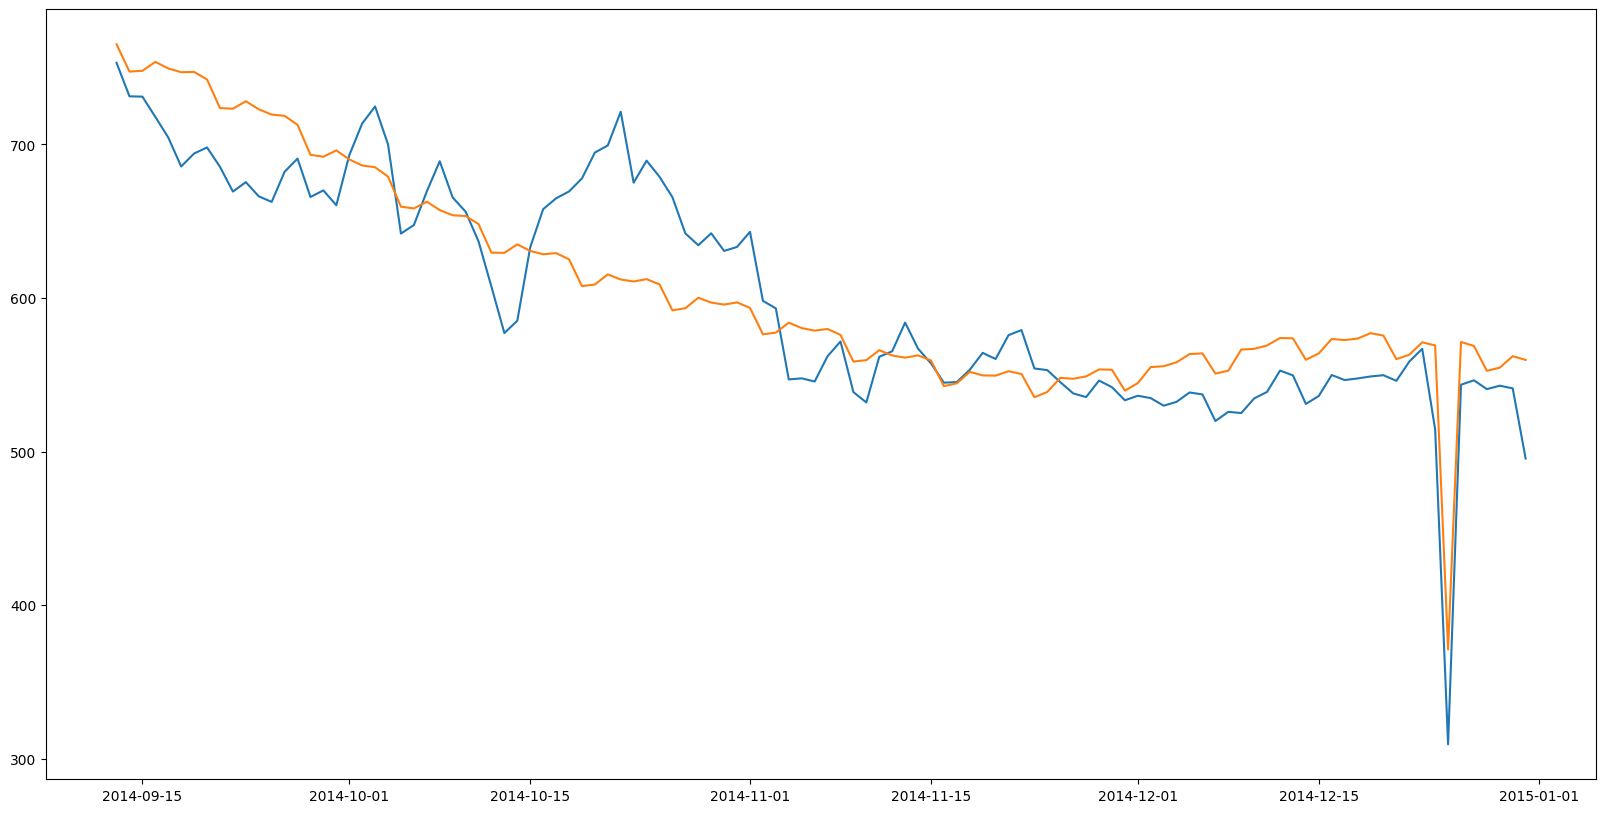

In [64]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')